In [57]:
import pandas as pd
from scipy import stats
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt
import missingno

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import warnings
warnings.filterwarnings('ignore')

In [2]:
house_data_original = pd.read_csv('california_housing_train.csv')
house_data_original.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [107]:
house_data_original.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
house_data_original["median_house_value"].describe()

count     17000.000000
mean     207300.912353
std      115983.764387
min       14999.000000
25%      119400.000000
50%      180400.000000
75%      265000.000000
max      500001.000000
Name: median_house_value, dtype: float64

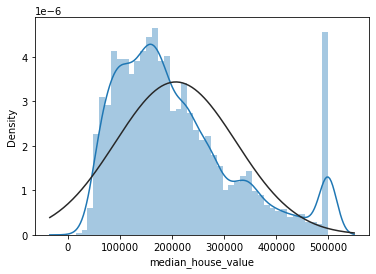

In [28]:
sns.distplot(house_data_original["median_house_value"], fit=norm)

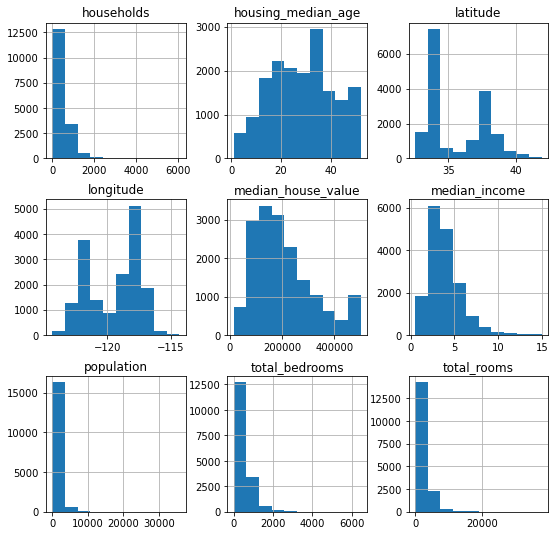

In [31]:
fig = house_data_original.hist(figsize = (9, 9))

# Матрица на корелација

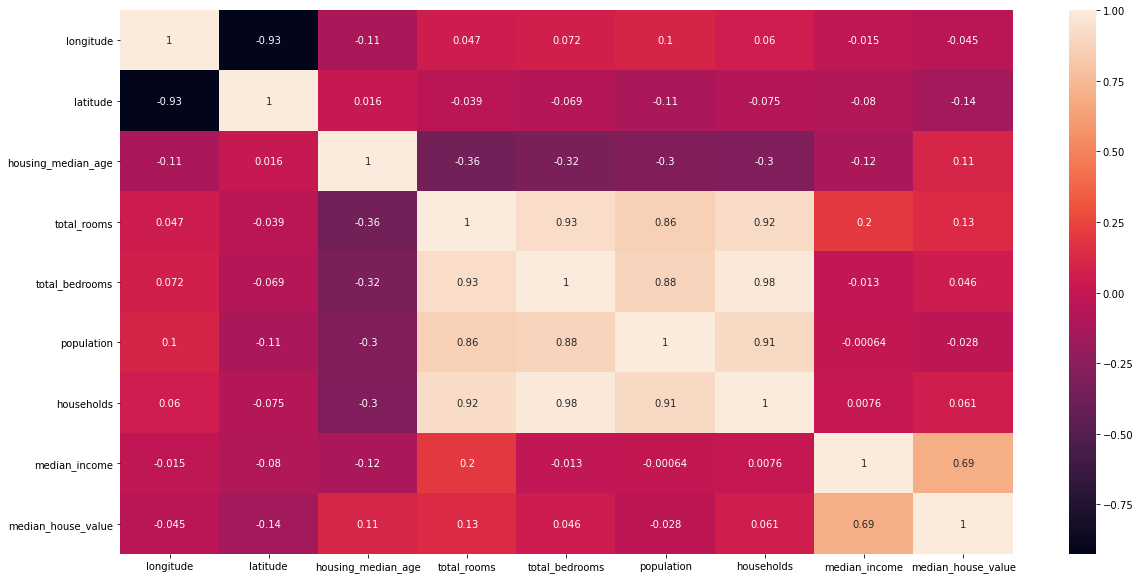

In [5]:
fig, ax = plt.subplots(figsize = (20, 10))
corr = house_data_original.corr()
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

Од матрицата на корелација јасно се воочува дека median_income има најголем коефициент за линеарна зависност со median_house_value. Атрибутите со најголем коефициент на корелација се longitude и latitude.

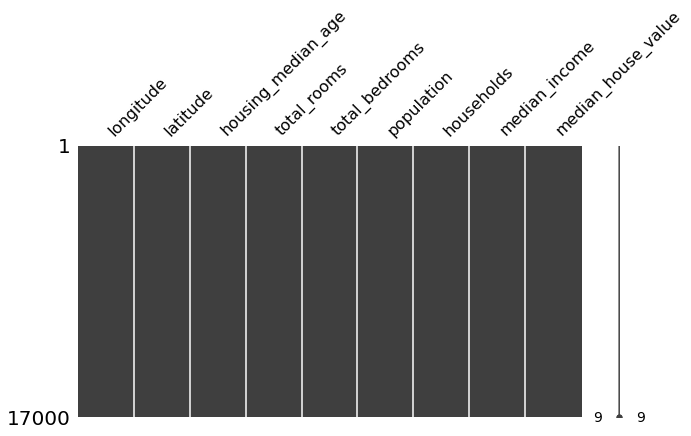

In [6]:
missingno.matrix(house_data_original, figsize=(10, 5))

Од missingno матрицата јасно се воочува дека нема празни елементи односно имаме комплетно множество.

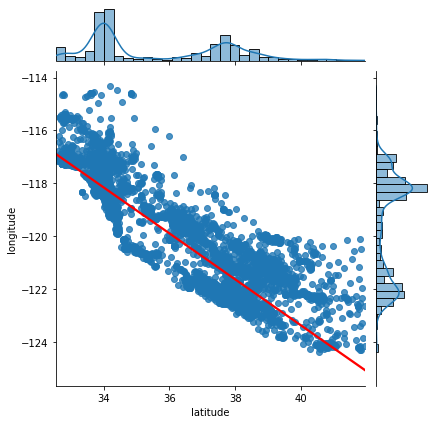

In [12]:
sns.jointplot(data=house_data_original, x="latitude", y="longitude", kind="reg", joint_kws={'line_kws':{'color':'red'}})

Овде чисто ја проверуваме линеарноста на двата елементи со најголем коефициент на корелација. Тоа се longitude и latitude (0.93)

# Feature and target jointplots

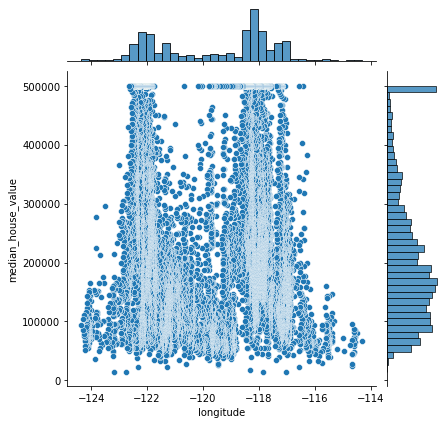

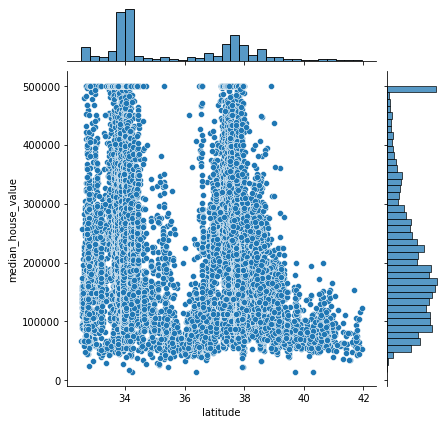

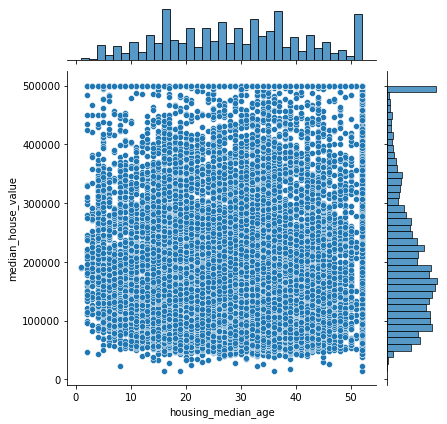

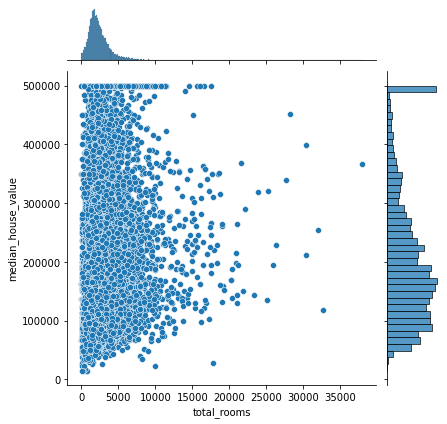

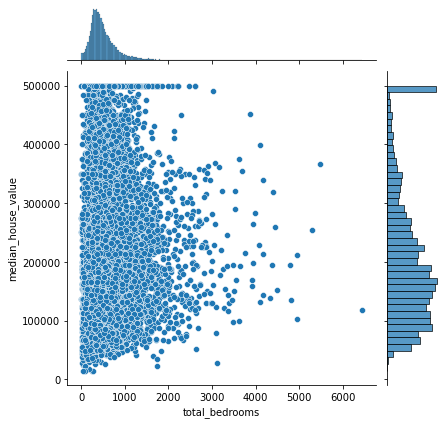

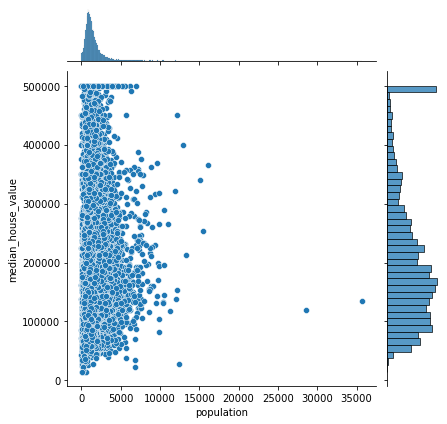

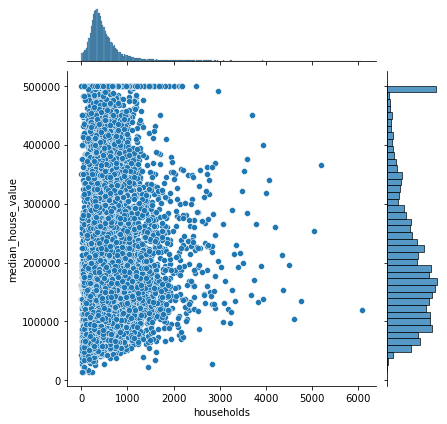

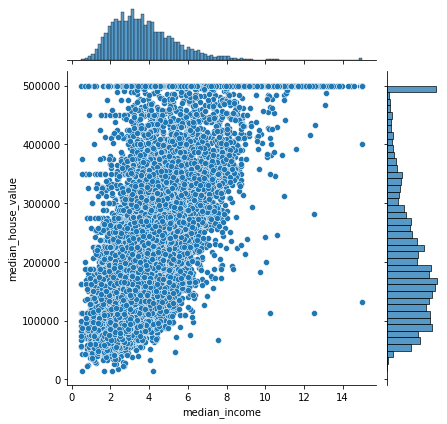

In [8]:
def jointplot():
    features = list(house_data_original.columns)[:-1]
    for feature in features:
        sns.jointplot(data=house_data_original, x=feature, y="median_house_value")
            
jointplot()

# Градење на регресија

### MinMax Scaler и делење на множеството на тренинг множество и тест множество


In [207]:
from sklearn.preprocessing import MinMaxScaler

x = house_data_original.drop('median_house_value', axis=1)
y = house_data_original.median_house_value

scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)
x = pd.DataFrame(x)

house_data_scaled = pd.DataFrame(scaler.fit_transform(house_data_original), columns=house_data_original.columns)

x1 = house_data_scaled.drop('median_house_value', axis=1)
y1 = house_data_scaled.median_house_value

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 42)

In [211]:
def mean_square_error(y_test, y_pred):
    args = []
    for i, j in zip(y_test, y_pred):
        args.append((i-round(j))**2)
    return sum(args) / len(y_test)

In [233]:
#Linearna regresija
lr = LinearRegression()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(f'Coeficients: {lr.coef_}')
print(f'Score: {lr.score(x_train, y_train)}')
print(f'Intercept: {lr.intercept_}')

print('\n Skaliran MEDIAN HOUSE VALUE \n')

lr.fit(x1_train, y1_train)
y1_pred = lr.predict(x1_test)
print(f'Coeficients: {lr.coef_}')
print(f'Score: {lr.score(x1_train, y1_train)}')
print(f'Intercept: {lr.intercept_}')

Coeficients: [ -432032.61307345  -402861.53315803    57445.78825124  -343217.74565123
   718794.45582471 -1193950.47400797   256476.08022021   582913.75454016]
Score: 0.636355383535472
Intercept: 368061.4962442692

 Skaliran MEDIAN HOUSE VALUE 

Coeficients: [-0.89078522 -0.83063891  0.11844444 -0.70766254  1.48204431 -2.4617434
  0.52881448  1.20187907]
Score: 0.636355383535472
Intercept: 0.7279609078813466


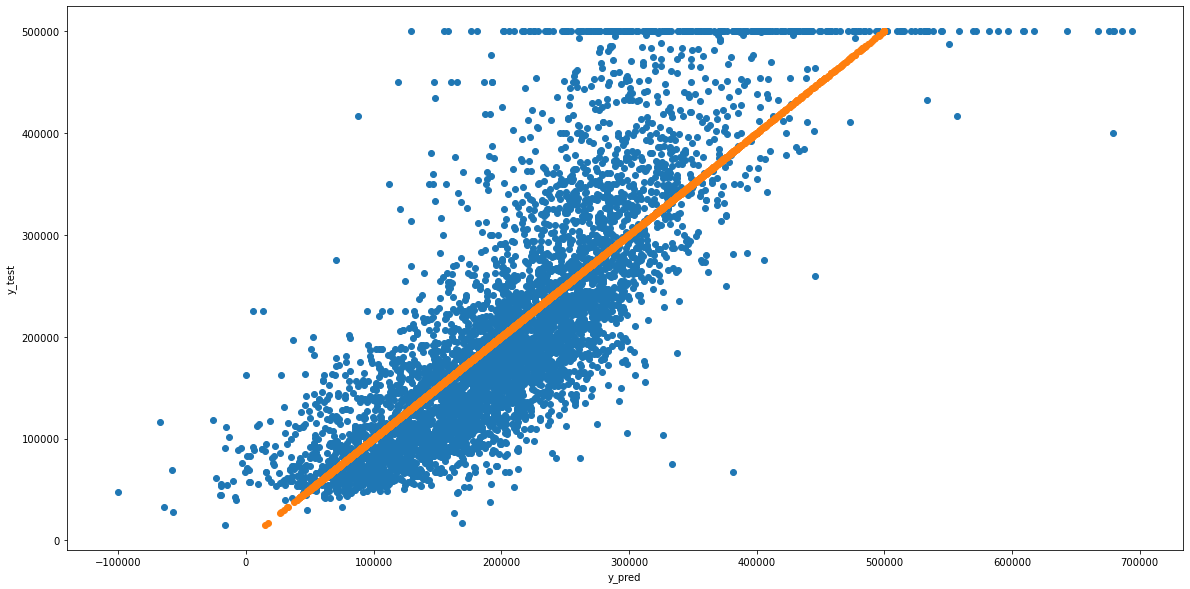

In [234]:
plt.figure(figsize=(20,10))
plt.scatter(y_pred, y_test)
plt.scatter(y_test,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [235]:
mean_square_error(y_test, y_pred)

4830763404.513922

In [237]:
mean_square_error(y_test, y_pred)**0.5 #RMSE ili rootMSE - ни покажува просечно колку ни е грешката. Во нашиот случај просечната грешка е околу 69503$

69503.6934595128

In [238]:
mean_squared_error(y_test, y_pred)

4830762847.990618

Воочуваме дека MSE е 4830762847. Првата грешка е рачно напишана функција додека пак другата е веќе готовата mean_squared_error. MSE има толку голема вредност поради самата природа на податоците. Понекогаш не е возможно да имаме мала вредност за МЅЕ а причината за тоа се вредностите на податоците.

In [239]:
mean_square_error(y1_test, y1_pred) #So skaliran median house income

0.1271084247564438

In [240]:
#Ridge regresija
lr = Ridge()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(f'Coeficients: {lr.coef_}')
print(f'Score: {lr.score(x_train, y_train)}')
print(f'Intercept: {lr.intercept_}')

print('\n Skaliran MEDIAN HOUSE VALUE \n')

lr.fit(x1_train, y1_train)
y1_pred = lr.predict(x1_test)
print(f'Coeficients: {lr.coef_}')
print(f'Score: {lr.score(x1_train, y1_train)}')
print(f'Intercept: {lr.intercept_}')

Coeficients: [-424191.44677587 -394917.61363887   58727.33593172 -238687.67718393
  528921.60798307 -847451.60105005  196754.91472713  571934.37724113]
Score: 0.6335515130092094
Intercept: 363166.54460862256

 Skaliran MEDIAN HOUSE VALUE 

Coeficients: [-0.87461793 -0.81425976  0.12108679 -0.49213751  1.09055552 -1.74731568
  0.40567856  1.17924128]
Score: 0.6335515130092094
Intercept: 0.7178682657156502


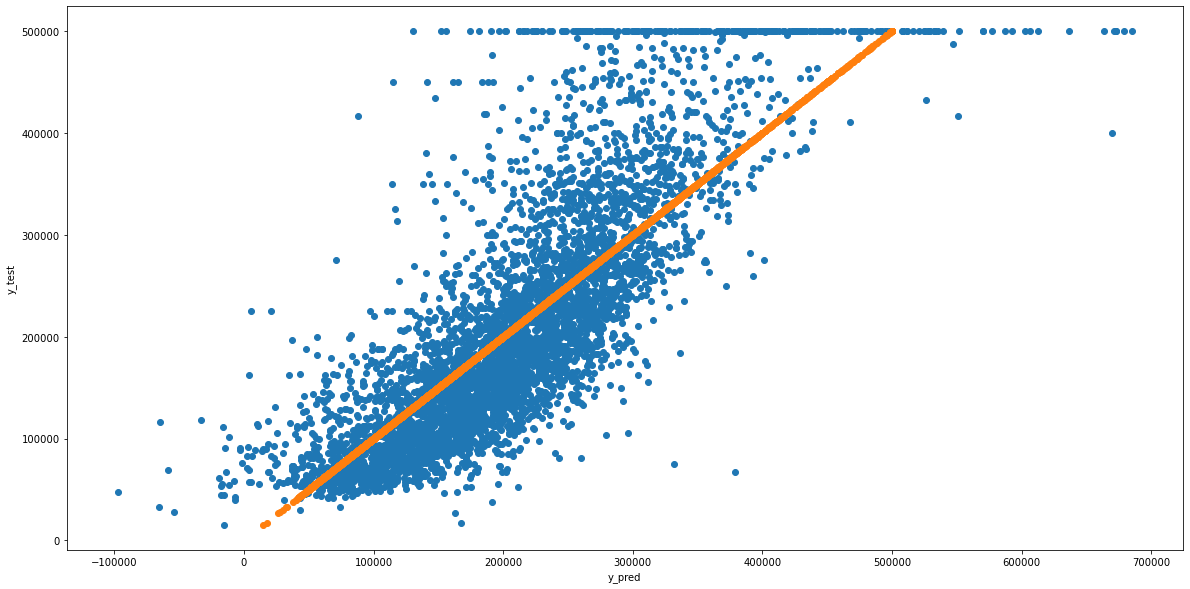

In [241]:
plt.figure(figsize=(20,10))
plt.scatter(y_pred, y_test)
plt.scatter(y_test,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [242]:
mean_square_error(y_test, y_pred)

4945279254.3690195

Со Ridge воочуваме малку поголема MSE во однос на Linear 

In [243]:
mean_square_error(y_test, y_pred)**0.5 #RMSE ili rootMSE - ни покажува просечно колку ни е грешката. Во нашиот случај просечната грешка е околу 70332$

70322.6795164193

In [244]:
mean_square_error(y1_test, y1_pred) #So skaliran median house income

0.12931363417906921

In [245]:
#Lasso regresija
lr = Lasso()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(f'Coeficients: {lr.coef_}')
print(f'Score: {lr.score(x_train, y_train)}')
print(f'Intercept: {lr.intercept_}')

print('\n Skaliran MEDIAN HOUSE VALUE \n')

lr.fit(x1_train, y1_train)
y1_pred = lr.predict(x1_test)
print(f'Coeficients: {lr.coef_}')
print(f'Score: {lr.score(x1_train, y1_train)}')
print(f'Intercept: {lr.intercept_}')

Coeficients: [ -432047.23237296  -402883.90398846    57474.52763788  -338035.41003797
   715952.23758276 -1188293.96508875   252144.17350171   582421.41663469]
Score: 0.6363539893785004
Intercept: 368180.6747291454

 Skaliran MEDIAN HOUSE VALUE 

Coeficients: [-0. -0.  0.  0.  0. -0.  0.  0.]
Score: 0.0
Intercept: 0.39348415508569845


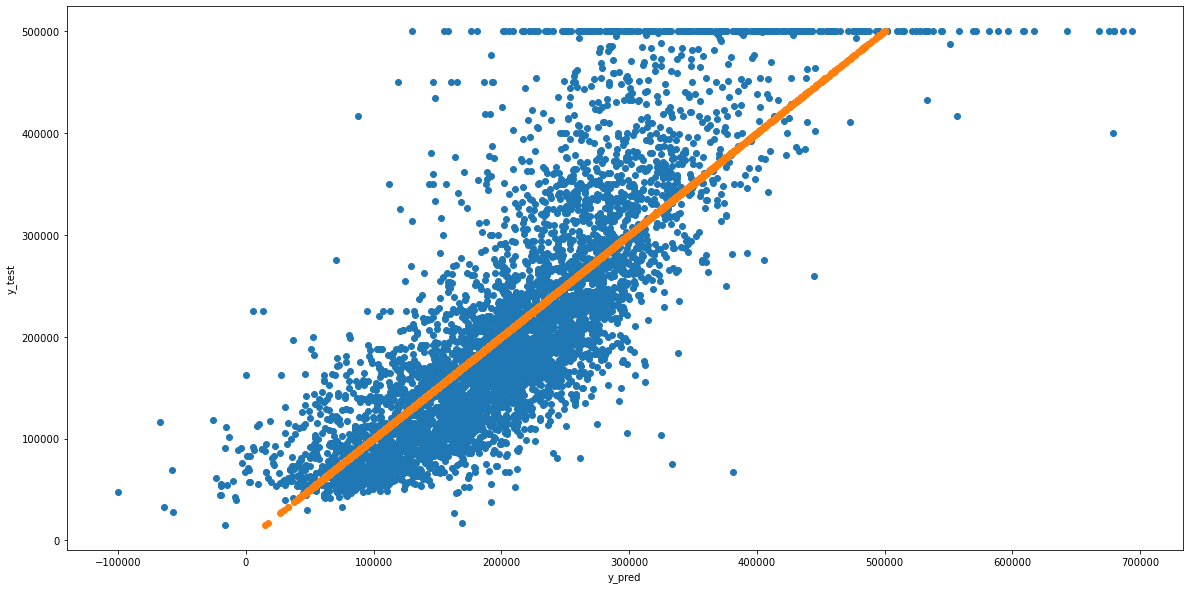

In [246]:
plt.figure(figsize=(20,10))
plt.scatter(y_pred, y_test)
plt.scatter(y_test,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [247]:
round(mean_square_error(y_test, y_pred))**0.5

69513.17849875662

In [248]:
mean_square_error(y_test, y_pred)**0.5 #RMSE ili rootMSE - ни покажува просечно колку ни е грешката. Во нашиот случај просечната грешка е околу 69513$

69513.17850112604

In [249]:
mean_square_error(y1_test, y1_pred) #So skaliran median house income

0.22154961202140852